In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/maziyar/anaconda3/envs/tf2/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tensorflow as tf

In [6]:
print(tf.__version__)

2.0.0-rc0


In [7]:
from tensorflow.keras.datasets import mnist

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

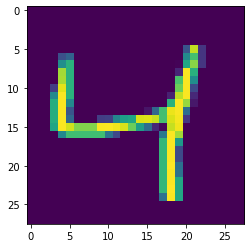

In [11]:
plt.imshow(X_train[2])

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

In [16]:
X_train.max()

255

In [18]:
X_train = X_train/255.0
X_test = X_test/255.0

In [19]:
X_train = X_train.reshape(60000,28,28,1)

In [20]:
X_test = X_test.reshape(10000,28,28,1)

In [21]:
X_train[0].shape

(28, 28, 1)

In [22]:
input_shape = X_train[0].shape

In [29]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [33]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=6, 
                    verbose=1, 
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 36s 594us/sample - loss: 0.9996 - accuracy: 0.6773 - val_loss: 27.6907 - val_accuracy: 0.8785
Epoch 2/6
60000/60000 [==============================] - 37s 622us/sample - loss: 0.4654 - accuracy: 0.8577 - val_loss: 23.1988 - val_accuracy: 0.9051
Epoch 3/6
60000/60000 [==============================] - 38s 637us/sample - loss: 0.4108 - accuracy: 0.8722 - val_loss: 20.7594 - val_accuracy: 0.9225
Epoch 4/6
60000/60000 [==============================] - 40s 661us/sample - loss: 0.3856 - accuracy: 0.8815 - val_loss: 18.6619 - val_accuracy: 0.9329
Epoch 5/6
60000/60000 [==============================] - 40s 671us/sample - loss: 0.3638 - accuracy: 0.8862 - val_loss: 17.5559 - val_accuracy: 0.9354
Epoch 6/6
60000/60000 [==============================] - 44s 732us/sample - loss: 0.3519 - accuracy: 0.8918 - val_loss: 14.8531 - val_accuracy: 0.9398
